# **Diplomado IA: Inteligencia Artificial I - Parte 2**. <br> Práctico 5: Ejercicio Práctico: Recomendación de Contenido
---
---

**Profesores:**
- Julio Hurtado
- Felipe del Río

**Ayudante:**
- Mathias Lambert
---
---
Fecha de Entrega: 22 de Octubre

Nombre alumno:

# Agenda

Diplomado IA: Inteligencia Artificial I - Parte 2.  Práctico 5: Recomendación de Contenido

<!-- Agenda:
 * Problema
 * Preparación
 * Entrenamiento
 * Recomendación -->

Problema

Preparación

> Datos

> Instalación de librerias

Entrenamiento

> Dataset

> Funciones de Entrenamiento

> Funciones para mostrar resultados

> Modelo

> Entrenamiento

Recomendación

> Obtención de Descriptores

> Encontrar similares

> Recomendación

> Metricas de Comparación


# Objetivo del Laboratorio
 
Una parte importante para consolidar nuevos conocimientos es ponerlos en práctica. Después de algunas clases donde hemos visto varios métodos y algoritmos diferentes es bueno tomar una pausa para poder aplicar estos conocimientos. 

En este laboratorio los aplicaremos a un ejemplo más real que los que hemos visto en laboratorios anteriores. El objetivo es corroborar el entendimiento de los conceptos claves, y que después podremos ser capaces de aplicarlos en diferentes problemas que nos podemos encontrar en la vida real.


## Problema
 
En este laboratorio aplicaremos los conocimientos vistos en las clases anteriores para entrenar un modelo que pueda recomendar contenido a un usuario de una red social, en base a sus interacciones pasadas.
 
En esta red social, una interacción está conformada por una imagen y un comentario, escrito por un usuario. El objetivo es generar una reacción en los usuarios, por lo que debemos recomendar o mostrarle imágenes de otros usuarios que tienen imágenes con textos similares. Por esta razón, tenemos que tener acceso tanto a las imágenes como al texto escrito por los usuarios para poder encontrar recomendaciones que causen un accionar en el usuario.


## Disclaimer

Existen muchas formas de resolver este problema. El objetivo de este laboratorio no es encontrar la mejor forma de resolver el problema, sino que aprender a plantear un problema real, viendo alternativas y complejidades que puedan ir apareciendo.





# Preparación
## Datos
 
Los datos son una de las partes más importantes al momento de entrenar modelos de aprendizaje. Si los datos no representan el problema que queremos resolver es muy difícil que nuestro modelo pueda encontrar una solución adecuada. De ahí viene la famosa expresión **"garbage in, garbage out"**.
 
En esta oportunidad utilizaremos un dataset abierto creado a partir de la red social **Pinterest**. Este dataset nos entrega imágenes y un comentario creado por un usuario. Por razones de *copyright* no tenemos acceso a las imágenes mismas, ya que esto trasgredería los términos y condiciones de esta red social. Para compartir las imagenes, esta base de datos comparte los descriptores de estas, encontrados con un modelo pre-entrenados sobre Imagenet.
 
Cada elemento de nuestro dataset está conformado por un par imagen-texto asociado a un usuario. Dado esto, definiremos como nuestra tarea, clasificar a qué usuario pertenece cada par imagen-texto del dataset.
 


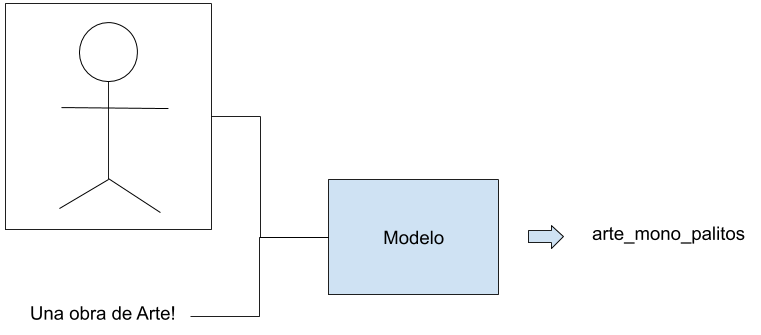

Podemos ver el modelo dividido de dos formas.

1.   Agrupar usuarios dependiendo de sus gustos
2.   Agrupar gustos dependiendo de los usuarios

Queremos que usuarios con gustos similares esten cercanos en el plano, y tambien que grupo de imagenes-texto similares entre ellos tambien esten cercanos.


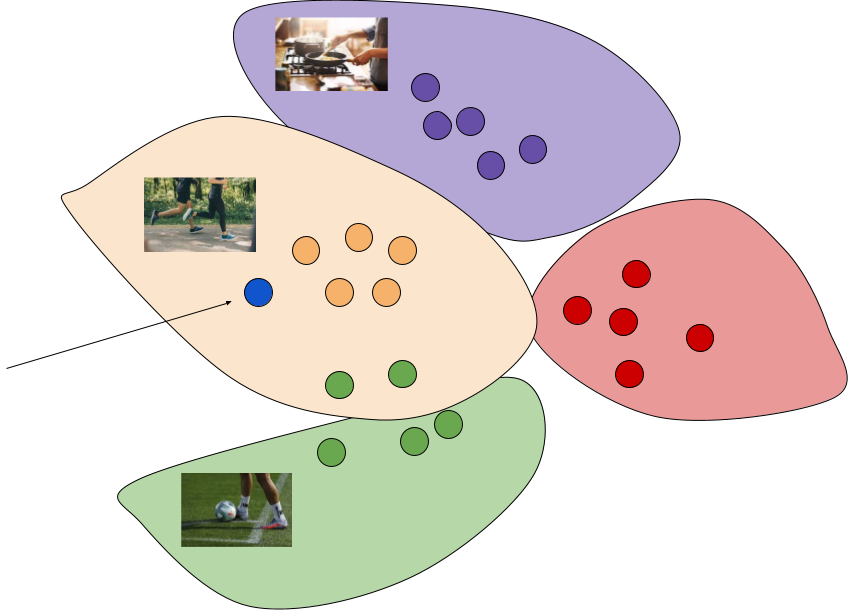

Para poder comenzar, lo primero que debemos hacer es descargar y descomprimir los archivos utilizando los siguientes comandos:

In [ ]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fs4k2zc5j5-3.zip

--2021-05-27 19:39:20--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fs4k2zc5j5-3.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.105.99
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.105.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2160173792 (2.0G) [application/octet-stream]
Saving to: ‘fs4k2zc5j5-3.zip’

fs4k2zc5j5-3.zip    100%[===================>]   2.01G  7.91MB/s    in 3m 17s  

2021-05-27 19:42:37 (10.5 MB/s) - ‘fs4k2zc5j5-3.zip’ saved [2160173792/2160173792]



In [ ]:
!unzip fs4k2zc5j5-3.zip

Archive:  fs4k2zc5j5-3.zip
  inflating: text_train.txt          
  inflating: text_test.txt           
  inflating: imag_val.txt            
  inflating: val_test_users.txt      
  inflating: images.rar              
  inflating: imag_train.txt          
  inflating: text_val.txt            
  inflating: train_users.txt         
  inflating: imag_test.txt           


In [ ]:
!wget https://data.mendeley.com/public-files/datasets/fs4k2zc5j5/files/cc4e3cb0-f2cf-4f4a-9395-a8215dc68b45/file_downloaded
!rm imag_train.txt
!mv file_downloaded imag_train.txt

--2021-05-27 19:43:33--  https://data.mendeley.com/public-files/datasets/fs4k2zc5j5/files/cc4e3cb0-f2cf-4f4a-9395-a8215dc68b45/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/96781484-1d06-4610-9c59-bb918db16f53 [following]
--2021-05-27 19:43:34--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/96781484-1d06-4610-9c59-bb918db16f53
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.100.0
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.100.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1699873240 (1.6G) [text/plain

Podemos verificar que tenemos todos los datos en nuestro Colab es revisar el navegador de archivos que se encuentra en la izquierda de nuestro navegador.

## Actividad 1

1- Asuma el contexto actual, usted trabaja en una empresa que tiene una red social muy similar a Facebook y quiere recomendar contenido a los usuarios. Responda las siguientes preguntas:

*   ¿Qué información recolectaría para poder entrenar su modelo?  
*   ¿Cómo usaría la información recolectada?
*   ¿Existe información externa (que no puede ser recolectada por su empresa) que pueda ser útil para mejorar el rendimiento del modelo? Si su respuesta es afirmativa, de un ejemplo.


# Respuestas
1. Informacion que recolectaría:
- Comentarios
- Post
- Imagenes, videos
- Interacciones entre usuarios
- Seguidores/siguiendo
- Metricas de uso (ej. cuanto tiempo pasa en cierto post/video)
- datos geográficos

2. Se puede hacer un perfil de recomendacion de contenido para los usuarios categorizando todo el contenido disponible y calculando que tanta afinidad tiene cada usuario con esas categorias

3. Si, siempre existe informacion que no puede ser recolectada por la empresa (por diversos motivos) que podría ser útil. Ej: Datos de otras aplicaciones (compras, listas de musica, videos que gustan, etc) 

## Instalación de librerías

Al igual que el jueves pasado, utilizaremos la librería `transformers` que nos facilita la utilización de modelos de texto como Bert, ademas de tokenizadores correspondientes.





In [ ]:
!pip install -q transformers==3.5.1
!pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


# Entrenamiento

In [1]:
import numpy as np
import pandas as pd
import os
from random import sample

import torch
from torch.utils.data import Dataset, DataLoader

import transformers
from transformers import BertTokenizer, BertModel
from transformers import PretrainedConfig

## Dataset

Creamos la clase `ContentRecommender` y su objetivo es cargar los datos y entregarlos de tal forma que sea aceptado por la clase `DataLoader` de PyTorch. 

In [4]:
class ContentRecommender(Dataset):
    def __init__(self, root_dir, data_set='train', num_classes=-1, sub_classes=None, tokenizer=None, transform=None, amount_triplet=3):
        if data_set == 'train':
            self.img_data = pd.read_csv(os.path.join(root_dir,'./imag_train.txt'), header=None).values
            self.txt_data = self.read_file_text(os.path.join(root_dir,'./text_train.txt'))
            self.targets = self.read_file_id(os.path.join(root_dir,'./train_users.txt'))
        elif data_set == 'val':
            self.img_data = pd.read_csv(os.path.join(root_dir,'./imag_val.txt'), header=None).values 
            self.txt_data = self.read_file_text(os.path.join(root_dir,'./text_val.txt'))
            self.targets = self.read_file_id(os.path.join(root_dir,'./val_test_users.txt'))
        elif data_set == 'test':
            self.img_data = pd.read_csv(os.path.join(root_dir,'./imag_test.txt'), header=None).values 
            self.txt_data = self.read_file_text(os.path.join(root_dir,'./text_test.txt'))
            self.targets = self.read_file_id(os.path.join(root_dir,'./val_test_users.txt'))
        else:
            raise('data_Set must be some of [train, val, test]')

        self.transform = transform
        self.tokenizer = tokenizer
        self.amount_triplet = amount_triplet

        self.sub_classes = None
        if num_classes != -1 or sub_classes:
            self.sub_set(num_classes, sub_classes)

        self.size_dataset()

    def sub_set(self, num_classes, sub_classes):
        if sub_classes is None:
            sample_cls = sample(list(set(self.targets)),num_classes)
        else:
            sample_cls = sub_classes

        d_img = []
        d_txt = []
        t = []
        for i,cls in enumerate(sample_cls):
            sample_data = list((torch.tensor(self.targets) == cls).nonzero())

            d_img.extend(self.img_data[sample_data])
            d_txt.extend([ self.txt_data[elem] for elem in sample_data ])
            t.extend([int(i)]*len(sample_data))
        
        self.sub_classes = sample_cls
        self.img_data = torch.tensor(d_img)
        self.txt_data = d_txt
        self.targets = t

    def read_file_id(self, name_file):
        data = []
        with open(name_file) as f: 
            for line in f: 
                data.append(int(line.strip()))
        return data

    def read_file_text(self, name_file):
        data = []
        with open(name_file) as f: 
            for line in f: 
                data.append(line.strip())
        return data

    def __len__(self):
        return len(self.txt_data)

    def __getitem__(self, idx):
        comment_text = str(self.txt_data[idx])
        comment_text = " ".join(comment_text.split())

        inputs_text = self.tokenizer.encode_plus(
                    comment_text,
                    None,
                    add_special_tokens=True,
                    max_length=100,
                    pad_to_max_length=True,
                    return_token_type_ids=True,
                    truncation=True,
                )

        return {
            'text_ids': torch.tensor(inputs_text['input_ids'], dtype=torch.long),
            'text_mask': torch.tensor(inputs_text['attention_mask'], dtype=torch.long),
            'text_token_type_ids': torch.tensor(inputs_text['token_type_ids'], dtype=torch.long),
            'targets': torch.tensor(self.targets[idx], dtype=torch.float),
            'img_data': self.img_data[idx],
            'idx_data': idx
            }

    def size_dataset(self):
        print('We have {} Image with {} features with {} texts. \
                The amount of different users is {}'.format(self.img_data.shape[0],
                                                            self.img_data.shape[1],
                                                            len(self.txt_data),
                                                            len(set(self.targets))))

Debido al tamaño del dataset y las limitaciones de Colab, vamos a utilizar solo un porcentaje del dataset total. Para esto, vamos a seleccionar solo los elementos de una cantidad de clases *num_classes*. 
 
Esto nos permite dos cosas:
 
1.   Poder entrenar con menos datos nuestro modelo, lo cual nos permite poder entrenar en una cantidad de tiempo razonable.
2.   Poder tener un clasificador de usuarios.

In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
num_classes = 10

trainset = ContentRecommender('./', 'train', num_classes=num_classes, tokenizer=tokenizer)
testset = ContentRecommender('./', 'test', sub_classes=trainset.sub_classes, tokenizer=tokenizer)

batch_size = 16

loaders = {
    'train': DataLoader(trainset, batch_size=batch_size, shuffle=True),
    'test': DataLoader(testset, batch_size=batch_size, shuffle=False),
    'val': DataLoader(testset, batch_size=batch_size, shuffle=False),
}

[tensor([4000]), tensor([4001]), tensor([4002]), tensor([4003]), tensor([4004]), tensor([4005]), tensor([4006]), tensor([4007]), tensor([4008]), tensor([4009]), tensor([4010]), tensor([4011]), tensor([4012]), tensor([4013]), tensor([4014]), tensor([4015]), tensor([4016]), tensor([4017]), tensor([4018]), tensor([4019]), tensor([4020]), tensor([4021]), tensor([4022]), tensor([4023]), tensor([4024]), tensor([4025]), tensor([4026]), tensor([4027]), tensor([4028]), tensor([4029]), tensor([4030]), tensor([4031]), tensor([4032]), tensor([4033]), tensor([4034]), tensor([4035]), tensor([4036]), tensor([4037]), tensor([4038]), tensor([4039]), tensor([4040]), tensor([4041]), tensor([4042]), tensor([4043]), tensor([4044]), tensor([4045]), tensor([4046]), tensor([4047]), tensor([4048]), tensor([4049]), tensor([4050]), tensor([4051]), tensor([4052]), tensor([4053]), tensor([4054]), tensor([4055]), tensor([4056]), tensor([4057]), tensor([4058]), tensor([4059]), tensor([4060]), tensor([4061]), tensor(

C:\Users\Arie\AppData\Local\Temp/ipykernel_35776/4150920751.py:40: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  d_img.extend(self.img_data[sample_data])
C:\Users\Arie\AppData\Local\Temp/ipykernel_35776/4150920751.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  d_img.extend(self.img_data[sample_data])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

AlexNet:

<figure>
<center>
<img src='https://www.mdpi.com/remotesensing/remotesensing-09-00848/article_deploy/html/images/remotesensing-09-00848-g001.png' height="500" />
<figcaption>Modelo Alexnet</figcaption>
</center>

</figure>

In [ ]:
idx = torch.randint(0, len(trainset.targets), (1,1)).item()
print("Un ejemplo del dataset:")
print(trainset.txt_data[idx])
print(trainset.img_data[idx])
print(trainset.targets[idx])

idxs_user = list((torch.tensor(trainset.targets) == trainset.targets[idx]).nonzero())
for id in idxs_user[:5]:
    print(trainset.txt_data[id])


Un ejemplo del dataset:
brown buttoned leg warmers allfreecrochet com
tensor([-5.7683, -3.7660, -2.1247,  ..., -1.8325,  0.4409, -1.9036],
       dtype=torch.float64)
9
flower of hearts
easy pulled pork recipe pork butt can diet pepsi bottle sweet baby ray s bbq sauce and lawry s season salt coat pork with lawry s put all ingredients in crock pot and cook for hours then use forks to shred the pork and cook for more hour serve on kaiser roll delish
provencal srynotsry i love this pattern
home remedy for sore throat hacking cough tight congestion using this in the winter instead of all those mucus relief drugs and decongestants that don t do a thing
pumpkin bread w pumpkin buttercream


## Funciones de Entrenamiento

Crearemos varias funciones que nos ayudarán con el entrenamiento de modelo. Les recomendamos que traten de entender cada una de estas funciones pues podrán reforzar conocimientos que ya han aprendido en el diplomado hasta ahora.

In [ ]:
def run_epoch(phase, model, loader, criterion, optimizer=None):
    n_batches = len(loader)
    if phase == 'train':
        model.train()
    elif phase == 'val' or 'test':
        model.eval()
        
    cum_loss = 0.0
    cum_acc = 0.0
    for n_batch, data in enumerate(loader, start=1):
        if phase == 'train': # Limpiamos los gradientes solo al entrenar
            optimizer.zero_grad()

        ids = data['text_ids'].to(device, dtype=torch.long)
        mask = data['text_mask'].to(device, dtype=torch.long)
        token_type_ids = data['text_token_type_ids'].to(device, dtype=torch.long)
        img = data['img_data'].to(device, dtype=torch.float)
        targets = data['targets'].to(device, dtype=torch.long)
        
        result = model(ids, mask, token_type_ids, img) # Aquí se ejecuta nuestro modelo

        loss = criterion(result, targets) # Cálculamos la pérdida
        cum_loss += loss.item()
        _, preds = torch.max(result.data, 1)

        # accuracy = calculate_metrics(targets, preds)
        cum_acc += torch.sum(preds == targets.data)
        if phase == 'train':
            loss.backward() # Hacemos backpropagation solo en train
            optimizer.step() # Actualizamos parámetros solo en train

        current_cum_loss = cum_loss / n_batch
        current_cum_acc = 100 * cum_acc / (n_batch * batch_size) 

        print(f'\r{phase.upper()}-Batch {n_batch}/{n_batches} '
              f'Loss: {current_cum_loss:.4f} '
              f'Acc: {current_cum_acc:.2f}% ', end='')
    
    epoch_loss = float(cum_loss / n_batch)
    epoch_acc = float(100 * cum_acc / (n_batch * batch_size))

    return epoch_loss, epoch_acc

def run_training(model, loaders, optimizer, criterion, n_epochs, scheduler):
    phases = ['train', 'val']
    history = {
        'train': {'loss': [], 'acc': []},
        'val': {'loss': [], 'acc': []}
    }

    print(f"Validating model before training")
    with torch.no_grad():
        val_loss, val_acc = run_epoch('val', model, loaders['val'], criterion)
    print()

    history['val']['loss'].append(val_loss)
    history['val']['acc'].append(val_acc)
    for epoch in range(1, n_epochs + 1):
        print(f"Epoch N°{epoch}")
        for phase in phases:
            epoch_loss, epoch_acc = run_epoch(phase, model, loaders[phase], criterion, optimizer=optimizer)
            # Registramos las pérdidas y accuracy por época, por fase
            history[phase]['loss'].append(epoch_loss)
            history[phase]['acc'].append(epoch_acc)
            print("")
        
        scheduler.step(history['val']['loss'][-1])

    return history

## Funciones para mostrar resultados

Definamos también algunas funciones que nos ayudarán a visualizar el entrenamiento y sus resultados de mejor forma.

In [ ]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sklearn.metrics

def graph_metrics(metricas_test, metricas_train, title=''):
    fig, ax = plt.subplots()
    plt.style.use('seaborn-white')
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3f'))
    plt.plot(range(1, int(len(metricas_train) + 1)), metricas_train, marker='o')
    plt.plot(range(int(len(metricas_test))), metricas_test, marker='o')
    plt.legend(['Train', 'Val'])
    plt.title(title)
    plt.show()


def graph_training_metrics(history):
    for metric in ['loss', 'acc']:
        title = f'{metric.capitalize()} vs N° Épocas'
        graph_metrics(history['val'][metric], history['train'][metric], title=title)


def print_report(train_history):
    graph_training_metrics(train_history)

    train_loss = train_history['train']['loss'][-1]
    train_acc = train_history['train']['acc'][-1]
    val_loss = train_history['val']['loss'][-1]
    val_acc = train_history['val']['acc'][-1]
    print(f'Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.2f}%')
    print(f'Val Loss: {val_loss:.4f} - Val Acc: {val_acc:.2f}%')

## Modelo

La particularidad de este modelo es que debe unir dos representaciones (una imagen y otra texto) para realizar la clasificación.

En el caso de la imagen, la representación nos la entrega el dataset que estamos utilizando. Esta viene dada por un vector de características, *feature vector*, extraída por un modelo convolucional pre-entrenado.

Para el texto, utilizamos BERT, un modelo pre-entrenado del tipo transformer que se utiliza para texto. Este nos permitirá aprovechar este pre-entrenamiento para encontrar una representación mas rica que entrenando un modelo simple.

Ambas representaciones son pasadas por capas *fully-connected* para disminuir su dimensionalidad, luego concatenadas y pasadas por una nueva capa *fully-connected*. Por último, esta representación es pasada por el clasificador para obtener la predicción.

In [ ]:
import torch

class ModelClass(torch.nn.Module):
    def __init__(self, pretrained=True, num_classes=117):
        super(ModelClass, self).__init__()
        if pretrained:
            self.l1_txt = transformers.BertModel.from_pretrained('bert-base-uncased')
        else:
            config = PretrainedConfig.from_pretrained('bert-base-uncased')
            self.l1_txt = transformers.BertModel(config)

        self.l2_txt = torch.nn.Linear(768, 64)
        self.l1_img = torch.nn.Linear(4096, 64)
        self.l1_join = torch.nn.Linear(64+64, 32)
        self.drop = torch.nn.Dropout(0.3)
        self.relu = torch.nn.ReLU(inplace=True)
        self.l2_join = torch.nn.Linear(32, num_classes)
    
    def forward(self, ids, mask, token_type_ids, img_data, features=False):
        _, output_text = self.l1_txt(ids, attention_mask=mask, token_type_ids=token_type_ids)
        output_text = self.l2_txt(output_text)
        output_img = self.l1_img(img_data)

        output_text = self.drop(self.relu(output_text))
        output_img = self.drop(self.relu(output_img))
        output = torch.cat([output_text, output_img], dim=1)

        output = self.l1_join(torch.cat([output_text, output_img], dim=1))
        output = self.drop(self.relu(output))
        if features:
            return output
        output = self.l2_join(output)
        return output

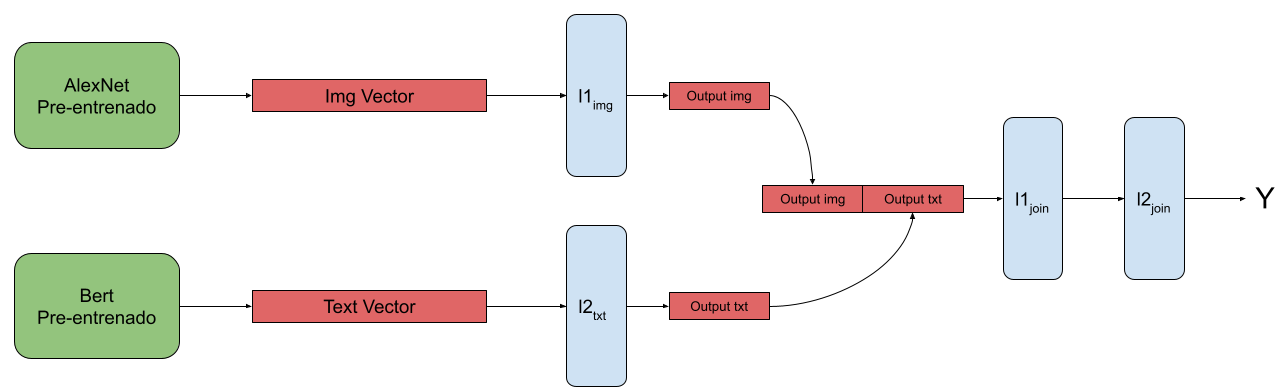

### Baseline

Comparar el funcionamiento de nuestro modelo es fundamental para ver si lo que estamos haciendo funciona bien o mal. En esta ocasión utilizaremos un segundo modelo para poder compararnos. En este solo le entregamos la información de las imágenes a este segundo modelo para realizar la recomendación, esperando que este sea peor que el modelo completo.

In [ ]:
class ModelClassImage(torch.nn.Module):
    def __init__(self, pretrained=True, num_classes=117):
        super(ModelClassImage, self).__init__()

        self.l1_img = torch.nn.Linear(4096, 64)
        self.drop = torch.nn.Dropout(0.3)
        self.relu = torch.nn.ReLU(inplace=True)
        self.l2_img = torch.nn.Linear(64, num_classes)

    def forward(self, ids, mask, token_type_ids, img_data, features=False):
        output = self.l1_img(img_data)
        output = self.drop(self.relu(output))
        if features:
            return output
        output = self.l2_img(output)
        return output

## Entrenamiento

Al momento del entrenamiento debemos seleccionar una función de perdida apropiada y un algoritmo de optimización que se comporte bien para este problema.

En este caso al ser un problema de clasificación podemos utilizar la función de pérdida *Cross Entropy*, muy utilizada para este tipo de problemas.

Una alternativa para la función de pérdida podría ser la función *Triplet Loss*, esta busca que el modelo genere representaciones cercanas para elementos de un mismo usuario y genere representaciones más distantes para elementos de usuarios distintos. Un  problema con esa alternativa, es que necesitamos generar triples para el entrenamiento (de ahí su nombre) con elementos de ancla, positivo y negativo para cada iteración en entrenamiento, causando que el proceso sea más complejo, en tiempo y recursos.

Tal como mencionamos en la clase de optimizadores, uno de los algoritmos de optimización en deep learning mas completos y utilizados es Adam, que tiene los beneficios de momentum y la normalización, generando learning rate locales para cada parametros.

Además utilizamos un scheduler en base a la perdida de nuestro set de validación.




Validating model before training


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


VAL-Batch 63/63 Loss: 2.3786 Acc: 10.22% 
Epoch N°1
TRAIN-Batch 250/250 Loss: 2.1065 Acc: 24.68% 
VAL-Batch 63/63 Loss: 1.8150 Acc: 42.16% 
Epoch N°2
TRAIN-Batch 250/250 Loss: 1.8344 Acc: 37.23% 
VAL-Batch 63/63 Loss: 1.6589 Acc: 45.24% 
Epoch N°3
TRAIN-Batch 250/250 Loss: 1.7341 Acc: 41.38% 
VAL-Batch 63/63 Loss: 1.5519 Acc: 47.82% 
Epoch N°4
TRAIN-Batch 250/250 Loss: 1.6762 Acc: 43.55% 
VAL-Batch 63/63 Loss: 1.5296 Acc: 49.80% 
Epoch N°5
TRAIN-Batch 250/250 Loss: 1.5951 Acc: 46.75% 
VAL-Batch 63/63 Loss: 1.4895 Acc: 49.21% 
Epoch N°6
TRAIN-Batch 250/250 Loss: 1.5448 Acc: 48.03% 
VAL-Batch 63/63 Loss: 1.4354 Acc: 51.59% 
Epoch N°7
TRAIN-Batch 250/250 Loss: 1.4962 Acc: 49.28% 
VAL-Batch 63/63 Loss: 1.4037 Acc: 52.88% 
Epoch N°8
TRAIN-Batch 250/250 Loss: 1.4605 Acc: 52.15% 
VAL-Batch 63/63 Loss: 1.3905 Acc: 52.28% 
Epoch N°9
TRAIN-Batch 250/250 Loss: 1.4150 Acc: 52.90% 
VAL-Batch 63/63 Loss: 1.3763 Acc: 55.36% 
Epoch N°10
TRAIN-Batch 250/250 Loss: 1.3748 Acc: 53.75% 
VAL-Batch 63/63 Los

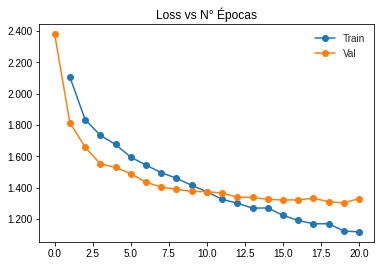

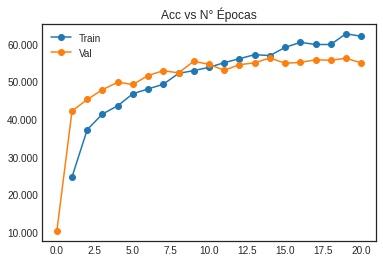

Train Loss: 1.1182 - Train Acc: 62.00%
Val Loss: 1.3307 - Val Acc: 54.96%


In [ ]:
from torch import optim
from torch.optim import lr_scheduler
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ModelClass(pretrained=True, num_classes=num_classes)
model.to(device)

criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-4) #1e-5
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer)

epochs = 20
history = run_training(model, loaders, optimizer, criterion, epochs, scheduler)

print_report(history)

Validating model before training
VAL-Batch 29/63 Loss: 2.7486 Acc: 16.38% 

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


VAL-Batch 63/63 Loss: 2.6775 Acc: 12.10% 
Epoch N°1
TRAIN-Batch 250/250 Loss: 1.9251 Acc: 33.83% 
VAL-Batch 63/63 Loss: 1.6073 Acc: 45.34% 
Epoch N°2
TRAIN-Batch 250/250 Loss: 1.5804 Acc: 46.25% 
VAL-Batch 63/63 Loss: 1.4873 Acc: 49.01% 
Epoch N°3
TRAIN-Batch 250/250 Loss: 1.4310 Acc: 50.20% 
VAL-Batch 63/63 Loss: 1.4549 Acc: 50.79% 
Epoch N°4
TRAIN-Batch 250/250 Loss: 1.3473 Acc: 53.55% 
VAL-Batch 63/63 Loss: 1.3721 Acc: 53.27% 
Epoch N°5
TRAIN-Batch 250/250 Loss: 1.2840 Acc: 56.38% 
VAL-Batch 63/63 Loss: 1.3562 Acc: 53.17% 
Epoch N°6
TRAIN-Batch 250/250 Loss: 1.2181 Acc: 58.20% 
VAL-Batch 63/63 Loss: 1.3326 Acc: 52.68% 
Epoch N°7
TRAIN-Batch 250/250 Loss: 1.1441 Acc: 59.58% 
VAL-Batch 63/63 Loss: 1.3370 Acc: 54.66% 
Epoch N°8
TRAIN-Batch 250/250 Loss: 1.1049 Acc: 61.15% 
VAL-Batch 63/63 Loss: 1.3530 Acc: 52.98% 
Epoch N°9
TRAIN-Batch 250/250 Loss: 1.0612 Acc: 63.05% 
VAL-Batch 63/63 Loss: 1.3337 Acc: 53.97% 
Epoch N°10
TRAIN-Batch 250/250 Loss: 1.0149 Acc: 64.25% 
VAL-Batch 63/63 Los

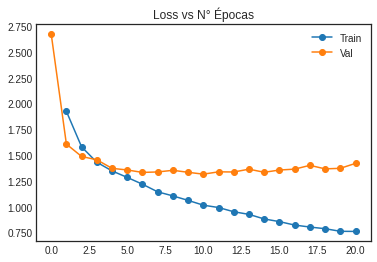

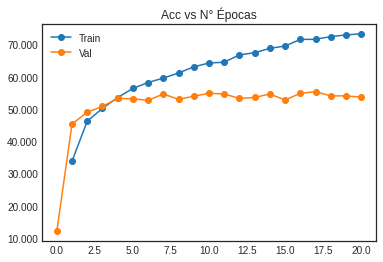

Train Loss: 0.7604 - Train Acc: 73.30%
Val Loss: 1.4204 - Val Acc: 53.67%


In [ ]:
from torch import optim
from torch.optim import lr_scheduler
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_img = ModelClassImage(pretrained=True, num_classes=num_classes)
model_img.to(device)

criterion = CrossEntropyLoss()
optimizer = Adam(model_img.parameters(), lr=1e-4) #1e-5
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer)

epochs = 20
history = run_training(model_img, loaders, optimizer, criterion, epochs, scheduler)

print_report(history)

## Actividad 2
1 - Con respecto a los conocimientos adquiridos hasta el momento:
- Enumere 2 limitaciones de nuestro modelo. Sugiera una mejora en base a estas limitaciones. 

- En base a los temas vistos hasta ahora en el diplomado, sugiera una mejora que podría hacerle a este modelo.

- Enumere dos formas que se le ocurran de realizar data augmentation con estos datos.


# Recomendación

Para recomendar contenido a usuarios nos vamos a basar en que usuarios prefieren contenido similar al que ya han interactuado antes. Es decir, imagenes y texto similares a los que a comentado pueden incentivar a generar una nueva interacción.

Una forma que tenemos de verificar si un par imagen-texto es similar a otro es mediante los descriptores que estos tipos de modelos generan para poder realizar la clasificación.



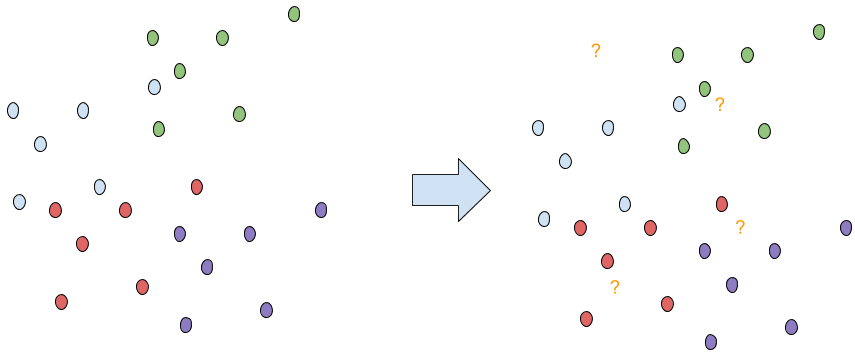

## Obtención de Descriptores

Para obtener una representación que tenga información tanto de la imagen como del texto, utilizamos el parámetro `features` de nuestro modelo. Con esto, en vez de devolvernos las predicciones del modelo, nos entrega un descriptor de nuestro par imagen-texto.
 
La motivación de esto es la misma que la vista el jueves pasado, donde utilizan modelos pre-entrenados para encontrar descriptores de imágenes y luego entrenar un clasificador con estos. La diferencia es que aquí no los vamos a utilizar para entrenar un clasificador sino que lo vamos a utilizar para encontrar distancias entre los diferentes elementos de nuestro dataset.

In [ ]:
device = torch.device("cpu" if torch.cuda.is_available() else "cpu")
model.to(device)

test_f = np.zeros((len(testset), 32), dtype=np.float32)
model.eval()
for i, b in enumerate(testset):
    ids = b['text_ids'].to(device, dtype=torch.long).unsqueeze(0)
    mask = b['text_mask'].to(device, dtype=torch.long).unsqueeze(0)
    token_type_ids = b['text_token_type_ids'].to(device, dtype=torch.long).unsqueeze(0)
    img = b['img_data'].to(device, dtype=torch.float).unsqueeze(0)
    targets = b['targets'].to(device, dtype=torch.long).unsqueeze(0)
        
    test_f[i] = model(ids, mask, token_type_ids, img, features=True).detach().numpy()

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Hacer lo mismo que en `f` pero con los datos de train

train_f = np.zeros((len(trainset), 32), dtype=np.float16)
model.eval()
for i, b in enumerate(trainset):
    ids = b['text_ids'].to(device, dtype=torch.long).unsqueeze(0)
    mask = b['text_mask'].to(device, dtype=torch.long).unsqueeze(0)
    token_type_ids = b['text_token_type_ids'].to(device, dtype=torch.long).unsqueeze(0)
    img = b['img_data'].to(device, dtype=torch.float).unsqueeze(0)
    targets = b['targets'].to(device, dtype=torch.long).unsqueeze(0)
        
    train_f[i] = model(ids, mask, token_type_ids, img, features=True).half().detach().numpy()

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


## Encontrar similares

Una vez que tenemos los descriptores tanto del set de entrenamiento como del set de test podemos comenzar a calcular la distancia de los nuevos datos (test) con respecto a los utilizado durante el entrenamiento (train).

La intuicion de esto es que queremos recomendar los nuevos elementos a usuarios con gustos similares, y para esto nos basamos en alguna metrica de distancia entre ambos descriptores. Al encontrar la distancia menor de un elementos con otro sabemos a que usuario recomendarle esta nueva imagen, ya que conocemos el usuario que escribio el comentario en esa imagen en los datos de entrenamiento.

In [ ]:
from sklearn.metrics import pairwise_distances
import heapq

def find_similar_images(embedding, query_id=None, metrics=('euclidean',), topk=5):
    assert len(metrics) > 0
    assert topk <= 30 # to avoid requesting too many images
    n = embedding.shape[0]
    if query_id is None:
        query_id = np.random.randint(n)
    results = {}
    # --- show retrieved images for each metric
    for metric in metrics:
        #print('-------- retrieved with metric = %s -----' % metric)
        distances = pairwise_distances(embedding[query_id].reshape(1,-1), embedding, metric=metric)
        heap = []
        for i in range(n):
            if i == query_id:
                continue
            if len(heap) < topk:
                heapq.heappush(heap, (-distances[0][i], i))
            else:
                heapq.heappushpop(heap, (-distances[0][i], i))
        heap.sort(reverse=True)
        results[metric] = tuple(zip(*heap))
        results[metric] = (list(results[metric][1]), [-dist for dist in results[metric][0]])
    return results

In [ ]:
find_similar_images(test_f, metrics=('cosine','euclidean'), query_id=2, topk=10)

{'cosine': ([41, 811, 84, 547, 278, 14, 46, 327, 373, 17],
  [0.035659492,
   0.039764345,
   0.050937533,
   0.054447412,
   0.055823922,
   0.056108713,
   0.058470488,
   0.064050496,
   0.07279831,
   0.0760988]),
 'euclidean': ([811, 46, 278, 41, 373, 14, 547, 327, 798, 84],
  [2.7927501,
   3.049584,
   3.2858646,
   3.2894495,
   3.4817758,
   3.7606015,
   3.7914298,
   3.8700418,
   3.9183667,
   4.0204864])}

## Recomendación

Tal como se menciono en la sección anterior, con las distancias entre los vectores podemos recomendar nuevo contenido a un usuario, considerando las distancias minimas entre estos.

In [ ]:
targets = np.array(testset.targets)
n_targets = len(set(targets))

In [ ]:
# Creo diccionarios con user_id => feats (los features concatenados de todos los items del usuario en train)
# y lo transformo a un np.array (user_repr)
from collections import defaultdict

user_dict = {}
for user_id, features in zip(trainset.targets, train_f):
    if not user_id in user_dict:
        user_dict[user_id] = []
    user_dict[user_id].append(features)

for user_id in user_dict:
    user_dict[user_id] = np.array(user_dict[user_id])

user_repr = np.array([user_dict[user_id] for user_id in range(n_targets)])

In [ ]:
# Calculo los scores para cada imágen en test con respecto a un usuario
metric = 'cosine'

n_users, n_images, _ = user_repr.shape
user_repr = user_repr.reshape(-1, 32)
dists = pairwise_distances(user_repr, test_f, metric=metric)
dists = dists.reshape(n_users, n_images, -1)
scores = dists.min(axis=1)

print(scores.shape)

(10, 1000)


In [ ]:
# Lista de recomendación
k = 10
recommendation_list = np.argpartition(scores, k)
recommendation_list = recommendation_list[:,:k]

En esta lista se muestra el id de los elementos de nuestro base de datos (imagen-texto) que le podria interesar a 10 usuarios diferentes, en base a las menores distancias de los elementos que conocemos del usuario con cada uno de los nuevos elementos que nos llegaron.

In [ ]:
recommendation_list

array([[168,  87,  96, 276, 218, 550,  35, 241, 210,  47],
       [116, 109, 168, 167, 192, 174, 385, 550, 117, 786],
       [293, 261, 232, 230, 286, 224,  18, 213,  35,  80],
       [306, 323, 346, 326, 635, 305, 332, 351, 380, 149],
       [411, 407, 495, 462, 904, 457, 459, 412, 433, 975],
       [959, 562, 538, 185, 513, 981, 362, 306, 734, 719],
       [607, 676, 651, 692, 639, 687, 821, 694, 815, 696],
       [700, 786, 779, 707, 752, 754, 731, 716, 799, 745],
       [839, 890, 817, 866, 830, 838, 895, 876, 854, 806],
       [980, 925, 462, 927, 939, 919, 991, 962, 432, 959]])

## Métricas de Comparación

Tal como vimos en clases, existen varias métricas que se pueden utilizar para comprobar el correcto funcionamiento de nuestro modelo de recomendación. 

Las primeras métricas son *Precision* y *Recall*, que nos entregan la cantidad de datos correctos recuperamos y estamos recuperando, respectivamente. La siguiente figura nos puede ayudar a entender estos conceptos.

<figure>
<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg' height="500" />
<figcaption>Cálculo de precision y recall.</figcaption>
</center>

</figure>

La *Precision* nos dice la cantidad de elementos correctos que recuperamos en nuestro set, es decir, de los elementos que recomendamos al usuario, cuantos de estos efectivamente pueden gustarle a la persona.

> $Precision = \frac{True Positive}{True Positive + False Positive} $

Por otro lado, el *Recall* nos indica la cantidad de elementos relevantes que le estamos mostrando al usuario del total de elementos relevantes que sabemos le pueden gustar. Es decir, del total de elementos relevantes para el usuario que tenemos en nuestra base de datos, cuantos de estos los estamos mostrando en nuestra recomendación. 

> $Recall = \frac{True Positive}{True Positive + False Negative} $

Una métrica particular para sistemas recomendadores es Normalized Discounted Cumulative Gain (nDCG), que busca entregar una metrica con respecto al ránking que le estamos entregando. La intuición es que los elementos mas relevantes debería aparecer primero en nuestro ránking para ir disminuyendo en relevancia.

> $nDCG_p = \frac{\sum_{i=1}^p\frac{2^{rel_i}-1}{log_2(i+1)}}{\sum_{i=1}^{REL_p}\frac{2^{rel_i}-1}{log_2(i+1)}} = \frac{DCG_p}{IDCG_p}$

En nuestro caso, todos los elementos que queremos recomendarle al usuario tienen igual relevancia (1) y los otros tienen relevancia cero (0).

In [ ]:
from sklearn.metrics import ndcg_score

def ndcg(scores, targets, k):
    relevance = np.zeros((targets.size, targets.max() + 1))
    relevance[np.arange(targets.size), targets] = 1
    relevance = relevance.T

    return ndcg_score(relevance, scores, k=k)

def pr_at_k(scores, targets, k):
    recs = np.argpartition(scores, k)
    recs = recs[:,:k]
    n_targets = len(set(targets))
    rels = np.array([np.where(targets == user_id)[0] for user_id in range(n_targets)])

    precision = []
    recall = []
    for user_id, (recommended, relevants) in enumerate(zip(recs, rels)):
        recommended = recommended[:k]
        recommended = set(recommended)
        relevants = set(relevants)
        p = len(recommended & relevants) / len(recommended)
        r = len(recommended & relevants) / len(relevants)
        precision.append(p)
        recall.append(r)

    return np.mean(p), np.mean(r) # P@k, R@k

In [ ]:
pr, rec = pr_at_k(scores, targets, k=400)
obtained_ndcg = ndcg(scores, targets, k=400)
print(f'P={pr}')
print(f'R={rec}')
print(f'nDCG={obtained_ndcg}')

P=0.235
R=0.94
nDCG=0.06784460693316849


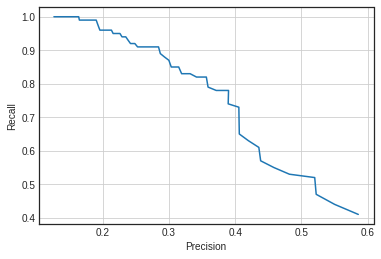

In [ ]:
pr_all = []
rec_all = []
ndcg_all = []
for i in range(70,800, 10):
    pr, rec = pr_at_k(scores, targets, k=i)
    pr_all.append(pr)
    rec_all.append(rec)
    o_ndcg = ndcg(scores, targets, k=i)
    ndcg_all.append(o_ndcg)

fig, ax = plt.subplots()
ax.plot(pr_all, rec_all)

ax.set(xlabel='Precision', ylabel='Recall')
ax.grid()

plt.show()

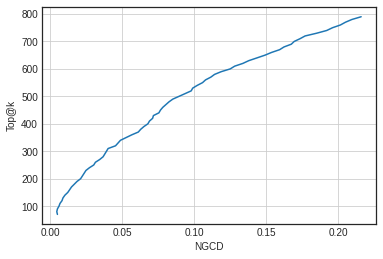

In [ ]:
fig, ax = plt.subplots()
ax.plot(ndcg_all, list(range(70, 800, 10)))

ax.set(xlabel='NGCD', ylabel='Top@k')
ax.grid()

plt.show()

## Actividad 3

1 - A parte del rendimiento del sistema recomendador, ¿qué otros aspectos le parece importante medir en un sistema como el desarrollado? De uno o dos y brevemente describa (1-3 frases) por qué es relevante.


2 - ¿Qué métrica (además de las mencionadas en clases) le podría servir para medir estos aspectos en su modelo? Enumere una o dos métricas.
